In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## data Prerocessing

In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [8]:
import re
import string

In [9]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

Convert uppercase to lowercase

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [12]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [13]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [16]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [17]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove numbers

In [22]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)


In [23]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [24]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 330.3 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 262.6 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 203.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 825.8 kB/s eta 0:00:02
   - -------------------------------------- 0.1/1.5 MB 653.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 525.1 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 547.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 612.6 kB/s eta 0:00:03
   ----

In [25]:
import nltk

In [26]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [28]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [30]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [32]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [33]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [34]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vacabulary

In [39]:
from collections import Counter
vocab = Counter()

In [40]:
vocab

Counter()

In [41]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [43]:
len(vocab)

15949

In [44]:
data.shape

(7920, 3)

In [45]:
tokens = [key for key in vocab if vocab[key] > 10]

In [46]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [47]:
len(vocab)

15949

In [48]:
tokens = [key for key in vocab if vocab[key] > 10]

In [49]:
len(tokens)

1145

In [50]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide Dataset

In [52]:
X = data['tweet']
y = data['label']

In [57]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 325.1 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 325.1 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 267.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 487.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 655.4 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.6 MB 652.2 kB/s eta 0:00:17
    --------------------------------------- 0.1/10.6 MB 607.9 kB/s eta 0:00:18
    --------------------------------------- 0.2/10.6 MB 737.3 kB/s eta 0:00:15


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
X_train.shape

(6336,)

In [60]:
X_test.shape

(1584,)

In [61]:
X_train

5868    hour left enjoy new samsung ssd macbook upgrad...
1135    new tool conspiracyoftheknot soni dscrx yeah g...
2669    im debat iphon kimkardashian use brother lot m...
1790    hello hello last photo samsung mobil samsung n...
7304    follow capetownsup instagram sup surf fun cape...
                              ...                        
577     samsung chief mobil dj koh trade inphon lost s...
6945    gain follow rt must follow follow back follow ...
7128    would deepli appreci futur iphon updat word au...
1394    gain follow rt must follow follow back follow ...
5745    name iphon dont believ job new usa god atheist...
Name: tweet, Length: 6336, dtype: object

In [62]:
X_test

2836    peopl twitter follow follow frank lol soni gam...
6435    week debug network right mac book air ethernet...
2970    new phone final new phone final android samsun...
616     guesswork frankwilliamsru b weekday selfi frie...
2821    thank ipod delet song morn noth listen way wor...
                              ...                        
884     ıcecream cream chocol appl banana pineappl str...
7725    beauti eye look good other beauti lip speak wo...
5222    scape iphoneographi iphon instagram iphonesia ...
182              audi offer appl android smartphon integr
2460    cant samsung att figur like appl verizon infer...
Name: tweet, Length: 1584, dtype: object

In [63]:
y_train


5868    0
1135    0
2669    0
1790    0
7304    0
       ..
577     1
6945    0
7128    0
1394    0
5745    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [64]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [65]:
vectorized_x_train = vectorizer(X_train, tokens)

In [67]:
vectorized_x_test = vectorizer(X_test, tokens)

In [68]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
y_train

5868    0
1135    0
2669    0
1790    0
7304    0
       ..
577     1
6945    0
7128    0
1394    0
5745    0
Name: label, Length: 6336, dtype: int64

In [70]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
y_test

2836    0
6435    1
2970    0
616     0
2821    1
       ..
884     0
7725    0
5222    0
182     0
2460    1
Name: label, Length: 1584, dtype: int64

In [72]:
y_train.value_counts()

label
0    4706
1    1630
Name: count, dtype: int64

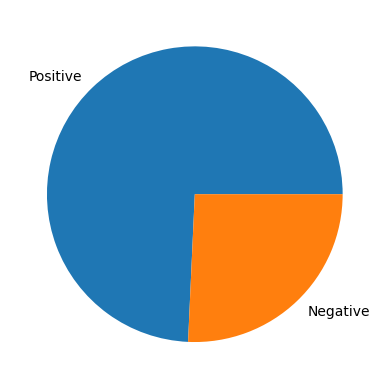

In [73]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [74]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 435.7 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/257.7 kB 245.8 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/257.7 kB 297.7 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/257.7 kB 353.1 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 409.6 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 361.0 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/257.7 kB 405.9 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/257.7 kB 405.9 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/257.7 kB 405.9 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/257.7 kB 405.9 kB/

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9412, 1145) (9412,)


In [76]:
y_train_smote.value_counts()

label
0    4706
1    4706
Name: count, dtype: int64

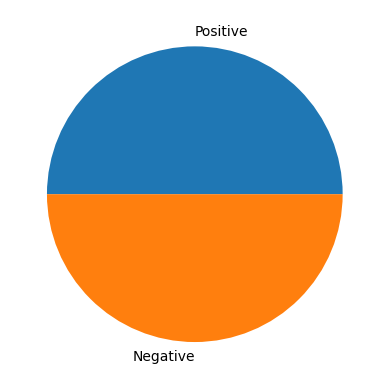

In [77]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Model Training and evaluation

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [79]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.918
	Recall = 0.969
	F1-Score = 0.943
Testing Scores:
	Accuracy = 0.876
	Precision = 0.707
	Recall = 0.859
	F1-Score = 0.775


## Naive Bayes

In [85]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.903
	Precision = 0.867
	Recall = 0.951
	F1-Score = 0.907
Testing Scores:
	Accuracy = 0.871
	Precision = 0.678
	Recall = 0.922
	F1-Score = 0.782


## Decision Tree

In [86]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.826
	Precision = 0.656
	Recall = 0.636
	F1-Score = 0.646


## Random Forest

In [87]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.854
	Precision = 0.715
	Recall = 0.692
	F1-Score = 0.703


 ## Suport Vector Machine

In [88]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.964
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.878
	Precision = 0.726
	Recall = 0.818
	F1-Score = 0.77


In [89]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)